 SRAJAL SHARMA, Data Science and Business Analytics Intern, 
 The Sparks Foundation(GRIP-FEB21)
 TASK 1- Prediction using Supervised ML
 # Objective- To predict the percentage score of a student based on the no. of study hours.

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading data from remote link
url = "http://bit.ly/w-data"
stu_data = pd.read_csv(url)
print("Data imported successfully")

display(stu_data.head(10))

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


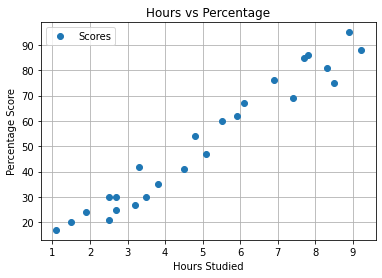

In [3]:
#Plotting given data 
stu_data.plot(x='Hours', y='Scores',style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

From this graph we observe that there is a linear relationship between the variables 'Hours' and 'Scores'. Hence,  linear regression model can be used for further prediction.

In [4]:
#dividing dataset into arrays using iloc function
x = stu_data.iloc[:, :1].values
y = stu_data.iloc[:, 1:].values
print('study hours and percentage scores have been successfully stored in x and y respectively')

study hours and percentage scores have been successfully stored in x and y respectively


In [5]:
# spliting data into training and test datset using Scikit-Learn's built-in train_test_split() method:

from sklearn.model_selection import train_test_split
X_train, X_test , y_train ,y_test = train_test_split(x,y, test_size= 0.2, random_state=0)
print('dataset has been splitted succesfully')

dataset has been splitted succesfully


In [6]:
#training the model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
print('training completed')

training completed


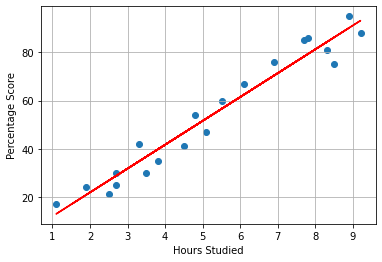

In [7]:
# Visualising model by plotting the regression line 

line = model.coef_*x+model.intercept_

plt.scatter(X_train, y_train)
plt.plot(x, line, color='red')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

In [8]:
#predicting scores y on the basis of given hours x

print('For given values x_test:')
print(X_test)
y_pred = model.predict(X_test)  
print('The predicted values of y_test are:')
print(y_pred)

For given values x_test:
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
The predicted values of y_test are:
[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


In [9]:
# Comparing Actual and Predicted values 

comp = pd.DataFrame({ 'Actual':y_test.tolist(), 'Predicted':y_pred.tolist()})
display(comp)


,Actual,Predicted
0,[20],[16.884144762398023]
1,[27],[33.732260779489835]
2,[69],[75.35701799818725]
3,[30],[26.79480124304026]
4,[62],[60.491033277223885]


In [10]:
#predicting score for 9.25 hours of study

hours = 9.25
req_pred = model.predict([[hours]])
print('The predicted score of a student who studies for',hours,'hours, is ',req_pred[0])

The predicted score of a student who studies for 9.25 hours, is  [93.69173249]


In [11]:
#Evaluating absolute mean error and accuracy of the model

from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
#Accuracy of the model
accuracy = model.score(X_test,y_test)
print("Accuracy of model : ",accuracy*100,'%')

Mean Absolute Error: 4.183859899002982
Accuracy of model :  94.54906892105353 %


Hence, we conclude that, if a student studies for 9.25 hours per day, then he/she may score 93.69% marks approximately.